<h1>Ricky Anggari
<h1>2209106037
<h1>Kelas A2'22


Pertama tama kita import semua librarynya

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

In [16]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy import stats

Lalu kita buat variabel untuk read/membaca data csv nya

In [12]:
ricky=pd.read_csv("Weather Data.csv")

Lalu kita cek apakah ada data duplikat atau data null,ternyata tidak ada

In [13]:
ricky.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [14]:
ricky.duplicated().sum()

0

Lalu disini saya mengambil Temp C dan Dew Point Temp C karena saya rasa kedua nya memiliki relasi yang dekat dan bagus

In [17]:
data_x_1 = 'Temp_C'
data_x_2 = 'Dew Point Temp_C'
data_y =ricky['Weather']

Tentukan x dan y nya

In [18]:
X = ricky[[data_x_1, data_x_2]]
y = data_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Lalu kita lakukan scalling dan encoding dengan menggunakan minmax scaller dan label encoder

In [19]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [20]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

Lalu kita tentukan input dan output layernya dan di compile,dan total layer input saya adalah 2
loss='binary_crossentropy': Ini adalah fungsi kerugian (loss function) yang digunakan dalam pelatihan model. Fungsi ini digunakan dalam tugas klasifikasi biner dan bertujuan untuk mengukur sejauh mana prediksi model mendekati target yang sebenarnya.
optimizer='Adam': Ini adalah algoritma yang digunakan untuk mengoptimalkan model selama pelatihan. Adam adalah salah satu algoritma optimasi yang sering digunakan dalam deep learning.


In [21]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[2]), #Input Layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output Layer
    # layers.Dense(2, activation='softmax')
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

NameError: name 'Sequential' is not defined

Kemudian kita melakukan fitting/melatih modelnya

In [22]:
model.fit(X_train, y_train, epochs = 50,validation_split=0.2)

NameError: name 'model' is not defined

Lalu kita masukkan prediksinya dengan model.predict

In [23]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

Kemudian kita evaluasi modelnya

In [ ]:
model.evaluate(X_test, y_test)

83/83 [==============================] - 0s 4ms/step - loss: -5834249.5000 - accuracy: 0.1976


[-5834249.5, 0.19764794409275055]

np.where(y_pred > 0.5, 1, 0): Ini adalah penggunaan np.where dari pustaka NumPy. Ini digunakan untuk mengganti nilai-nilai dalam array y_pred sesuai dengan kondisi yang diberikan. Dalam hal ini, kondisinya adalah y_pred > 0.5. Artinya, untuk setiap elemen y_pred, jika nilainya lebih besar dari 0,5, maka nilainya diganti menjadi 1, dan jika tidak, nilainya diganti menjadi 0. Hasilnya adalah array biner yang mengindikasikan prediksi kelas.

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

Lalu disini kita lihat akurasinya

In [ ]:
accuracy_score(y_test, y_pred)

0.19764795144157815

Kemudian menggunakan grafik untuk menunjukan akurasi

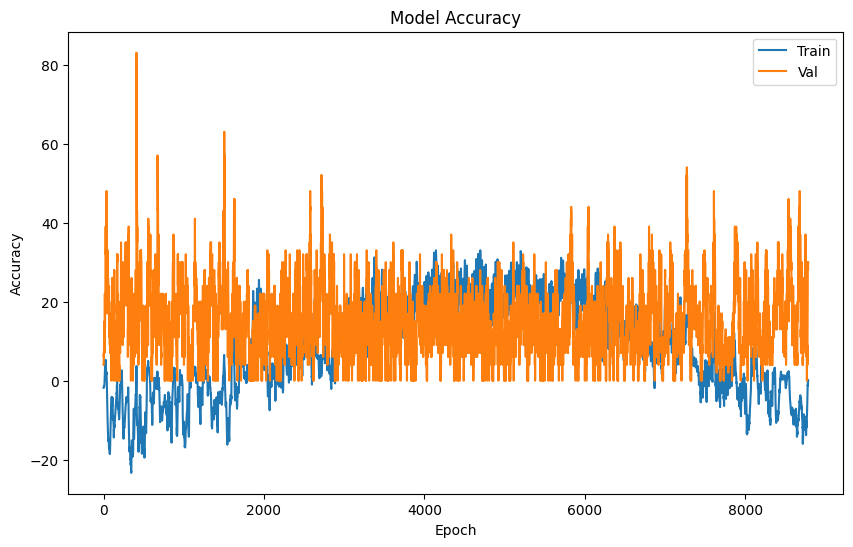

In [24]:
import matplotlib.pyplot as plt
train_accuracy = ricky['Temp_C']
val_accuracy = ricky['Wind Speed_km/h']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Val')
plt.xlabel('Epoch')   
plt.ylabel('Accuracy')  
plt.title('Model Accuracy')
plt.legend()
plt.show()